## Analise da Loja Alura Store

### Objetivo

Durante este desafio, eu irei ajudar o Senhor João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento. Para isso, irei analisar dados de vendas, desempenho e avaliações das 4 lojas fictícias da Alura Store. O objetivo é identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

**Etapas do projeto:**

- Carregar e manipular dados CSV com a biblioteca Pandas .
- Criar visualizações de dados com biblioteca Matplotlib.
- Analisar métricas como faturamento, avaliações e desempenho de vendas.

**Ferramentas Utilizadas**

- Pandas 🐼
- Matplotlib 📊


### Importação e tratemento dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [ ]:
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
for loja in [loja1, loja2, loja3, loja4]:
  loja.info()
  loja.head()
  loja.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

Como no dataset não possui dados nulos e estão formatados corretamente, iremos prosseguir para a proxima etapa.


#1. Análise do faturamento


In [ ]:
faturamento = {"Loja 1": loja1['Preço'].sum(),
               "Loja 2": loja2['Preço'].sum(),
               "Loja 3": loja3['Preço'].sum(),
               "Loja 4": loja4['Preço'].sum()}

<ipython-input-4-68743008a4cb>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'R$ {x:,.0f}' for x in ax.get_yticks()])


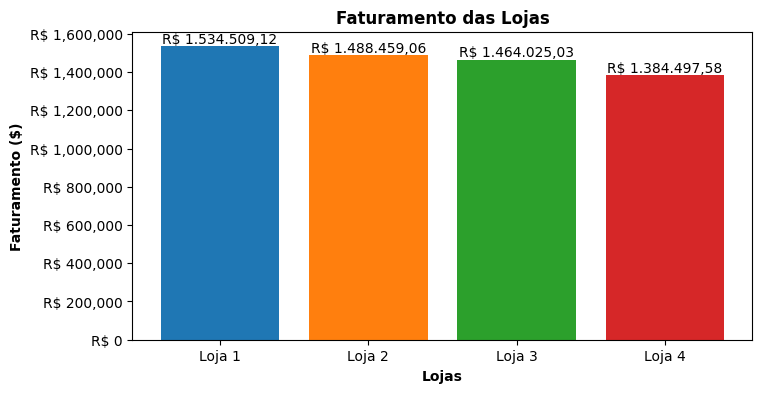

In [ ]:
figure, ax = plt.subplots(figsize=(8, 4))

grafico_faturamento = ax.bar(faturamento.keys(), faturamento.values(),
                             color=["tab:blue", "tab:orange", "tab:green", "tab:red"])

ax.set_title('Faturamento das Lojas', fontweight='bold')
ax.set_xlabel('Lojas', fontweight='bold')
ax.set_ylabel('Faturamento ($)', fontweight='bold')
plt.gca().set_yticklabels([f'R$ {x:,.0f}' for x in ax.get_yticks()])

ax.bar_label(grafico_faturamento,
             label_type='edge',
             labels=[f'R$ {x:,.2f}'
             .replace(',', 'X')
             .replace('.', ',')
             .replace('X', '.')
             for x in faturamento.values()])

plt.show()

### Relatorio

🏪 **Faturamento das Lojas:**

* Loja 1: R$ 1.534.509,12

* Loja 2: R$ 1.488.459,06

* Loja 3: R$ 1.464.025,03

* Loja 4: R$ 1.384.497,58

🔍 **Análise:**

- A Loja 1 obteve o maior faturamento, superando as demais com uma diferença de R$ 146.051,54 em relação à Loja 4, que teve o menor faturamento.

- A variação entre as lojas é relativamente pequena, indicando uma distribuição equilibrada do desempenho comercial.

# 2. Vendas por Categoria


In [ ]:
vendas_por_categoria = pd.DataFrame({"Loja 1": loja1.groupby('Categoria do Produto')['Preço'].sum(),
                                     "Loja 2": loja2.groupby('Categoria do Produto')['Preço'].sum(),
                                     "Loja 3": loja3.groupby('Categoria do Produto')['Preço'].sum(),
                                     "Loja 4": loja4.groupby('Categoria do Produto')['Preço'].sum()})
vendas_por_categoria.head()

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,23993.78,21262.21,25869.20,27015.67
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
eletronicos,572659.23,547773.71,547699.92,545966.86
esporte e lazer,52387.55,46326.09,47456.10,44465.65
instrumentos musicais,121731.69,139987.03,103174.45,100136.50


In [ ]:
vendas_por_categoria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, brinquedos to utilidades domesticas
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Loja 1  8 non-null      float64
 1   Loja 2  8 non-null      float64
 2   Loja 3  8 non-null      float64
 3   Loja 4  8 non-null      float64
dtypes: float64(4)
memory usage: 320.0+ bytes


<ipython-input-21-74df15cc36f1>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'R$ {x:,.0f}' for x in ax.get_yticks()])


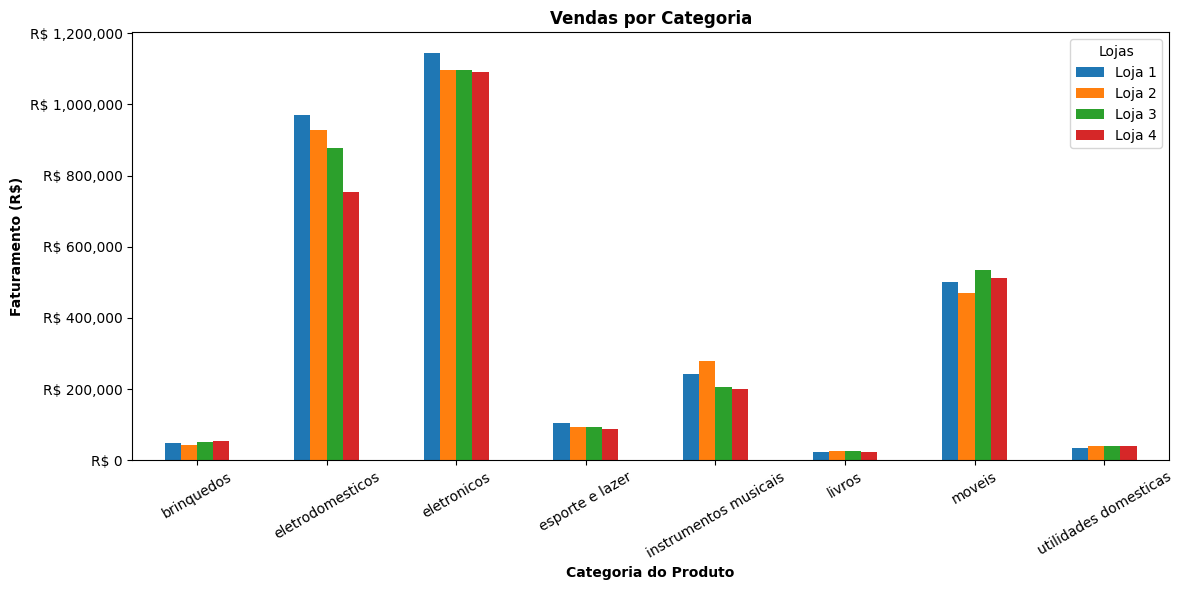

In [ ]:
vendas_por_categoria.plot(kind="bar", figsize=(12, 6), rot=30,
                          color=["tab:blue", "tab:orange", "tab:green", "tab:red"])
plt.gca().set_yticklabels([f'R$ {x:,.0f}' for x in ax.get_yticks()])

plt.title("Vendas por Categoria", fontweight='bold')
plt.xlabel("Categoria do Produto", fontweight='bold')
plt.ylabel("Faturamento (R$)", fontweight='bold')

plt.legend(title='Lojas', loc='upper right')


plt.tight_layout()
plt.show()

### 📊 Relatório de Faturamento por Categoria de Produto e Loja
O gráfico exibe o faturamento de quatro lojas em diferentes categorias de produtos, permitindo uma análise comparativa detalhada entre unidades e segmentos de vendas.

#### **📌 Principais Categorias:**
1. **Eletrônicos:**

* Categoria com maior volume de faturamento em todas as lojas.
* Destaque para a Loja 1, que lidera com cerca de R$ 1.150.000,00, ligeiramente à frente das demais.

2. **Eletrodomésticos:**

* Segunda categoria com maior receita.
* A Loja 1 novamente é a que mais se destaca, com as Lojas 2 e 3 em seguida.
* A Loja 4 tem um desempenho visivelmente menor nesse segmento, o que pode indicar oportunidade de melhoria.

3. **Móveis:**

* Apresenta boa performance, com destaque para a Loja 3, superando as demais.

#### **📉 Categorias com Menor Faturamento:**
* **Brinquedos, Livros, e Utilidades Domésticas** tiveram baixa representatividade no faturamento geral.
  * Pode indicar menor demanda, baixo estoque ou pouca ênfase comercial.

* **Esporte e Lazer, Instrumentos Musicais:**
  * Moderado desempenho. A Loja 2 teve destaque em instrumentos musicais, isso indica que possivelmente houve mais ações promocionais ou perfil de público regional.

#### 📌 Insights:
* Loja 1 apresenta o melhor desempenho geral, especialmente em categorias de maior valor agregado (eletrônicos e eletrodomésticos).
* Loja 4 é a que mais sofre variação negativa em várias categorias, o que pode explicar o baixo faturamento.


# 3. Média de Avaliação das Lojas

In [ ]:
avaliacao_loja = pd.DataFrame({"Loja 1": loja1['Avaliação da compra'].mean(),
                               "Loja 2": loja2['Avaliação da compra'].mean(),
                               "Loja 3": loja3['Avaliação da compra'].mean(),
                               "Loja 4": loja4['Avaliação da compra'].mean()},
                              index=['Média de Avaliação'])
avaliacao_loja.head()

,Loja 1,Loja 2,Loja 3,Loja 4
Média de Avaliação,3.976685,4.037304,4.048326,3.995759


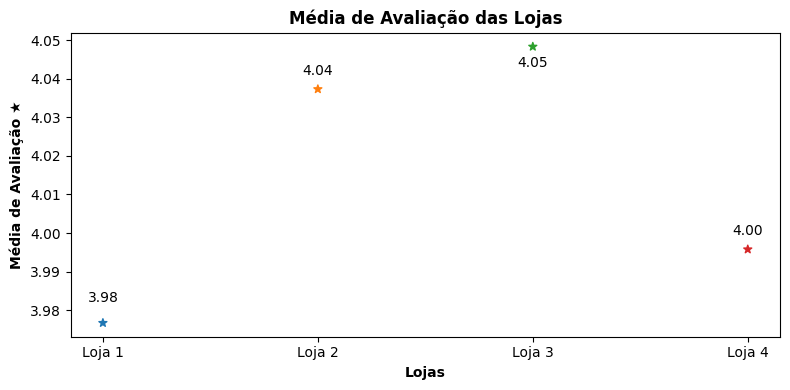

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x=avaliacao_loja.columns, y=avaliacao_loja.values[0],
            color=["tab:blue", "tab:orange", "tab:green", "tab:red"],
            marker="*")

# Limites do eixo Y
y_min, y_max = plt.ylim()

for x_coord, y_coord, label in zip(avaliacao_loja.columns, avaliacao_loja.values[0], avaliacao_loja.values[0]):
    y_position_ratio = (y_coord - y_min) / (y_max - y_min)

    # Ajuste automático da posição do texto
    if y_position_ratio > 0.9:
        offset = -15  # muito alto → texto para baixo
    elif y_position_ratio < 0.1:
        offset = 15   # muito baixo → texto mais acima
    else:
        offset = 10   # posição normal

    plt.annotate(f'{label:.2f}', (x_coord, y_coord), textcoords="offset points", xytext=(0, offset), ha='center')

plt.title("Média de Avaliação das Lojas", fontweight='bold')
plt.xlabel("Lojas", fontweight='bold')
plt.ylabel("Média de Avaliação ★", fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Relatório de Desempenho - Média de Avaliação das Lojas

Loja   | Média de Avaliação ★
-------|------
Loja 1 | 3,98
Loja 2 | 4,04
Loja 3 | 4,05
Loja 4 | 4,00

#### 📈 Análise Geral
* Loja 3 apresentou a melhor média de avaliação, com 4,05 estrelas, indicando um alto nível de satisfação dos clientes.
* Loja 2 também teve um desempenho forte, com 4,04 estrelas, ficando logo atrás da líder.
* Loja 4 ficou em terceiro, com 4,00 estrelas, mantendo uma média sólida, porém um pouco inferior às duas primeiras.
* Loja 1, com 3,98 estrelas, foi a que obteve a menor média, embora ainda dentro de um bom patamar de satisfação (Maior quer 3,5).

# 4. Produtos Mais e Menos Vendidos

In [ ]:
numero_de_vendas = pd.DataFrame({"Quantidade": loja1.groupby('Produto')['Preço'].count() +
                                 loja2.groupby('Produto')['Preço'].count() +
                                 loja3.groupby('Produto')['Preço'].count() +
                                 loja4.groupby('Produto')['Preço'].count()
                                 }).sort_values(by='Quantidade', ascending=False)

numero_de_vendas.tail()

,Quantidade
Produto,
Ciência de dados com python,166
Guitarra,165
Mochila,163
Headset,158
Celular ABXY,157


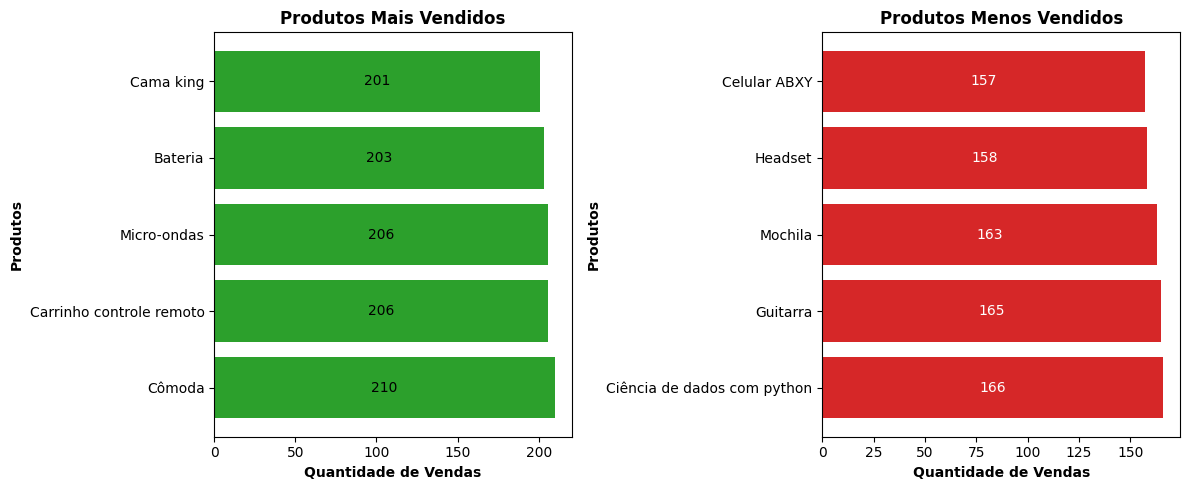

In [ ]:
figure, ax = plt.subplots(1, 2, figsize=[12,5])

ax[0].barh(numero_de_vendas.index[:5], numero_de_vendas['Quantidade'][:5],
          color=["tab:green"])
ax[1].barh(numero_de_vendas.index[-5:], numero_de_vendas['Quantidade'][-5:],
          color=["tab:red"])


#Numero de produtos vendidos
ax[0].bar_label(ax[0].containers[0], label_type='center')
ax[1].bar_label(ax[1].containers[0], label_type='center',
                color='w')

#Titulo dos graficos
ax[0].set_title('Produtos Mais Vendidos', fontweight='bold')
ax[1].set_title('Produtos Menos Vendidos', fontweight='bold')

#Titulo dos eixos
ax[0].set_xlabel('Quantidade de Vendas', fontweight='bold')
ax[1].set_xlabel('Quantidade de Vendas', fontweight='bold')
ax[0].set_ylabel('Produtos', fontweight='bold')
ax[1].set_ylabel('Produtos', fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Relatório de Vendas por Produto
#### ✅ Produtos Mais Vendidos
Os cinco produtos com maior volume de vendas são:


Produto	|Quantidade de Vendas
--------|-----------
Cômoda |	210
Carrinho controle remoto |	206
Micro-ondas	|206
Bateria	|203
Cama king	|201


##### Observações:

- Cômoda foi o produto com maior destaque, alcançando 210 unidades vendidas.
- Houve um empate entre Micro-ondas e Carrinho controle remoto, ambos com 206 unidades, o que indica um bom desempenho em categorias distintas (eletrodoméstico e brinquedo).
- Todos os itens nesta lista ultrapassaram a marca de 200 vendas, refletindo forte aceitação no mercado.

####⚠️ Produtos Menos Vendidos
Os cinco produtos com menor número de vendas foram:

Produto	| Quantidade de Vendas
--------|--------
Celular | ABXY	157
Headset	|158
Mochila	| 163
Guitarra|	165
Ciência de dados com python|	166

##### Observações:

- Celular ABXY teve a menor quantidade de vendas, com 157 unidades, o que pode indicar baixo apelo ou necessidade de revisão na estratégia de marketing/preço.
- Os produtos nessa lista estão abaixo de 170 vendas, o que representa uma margem considerável em relação aos mais vendidos.

# 5. Frete Médio por Loja


In [ ]:
frete_medio = pd.DataFrame({"Loja 1": loja1.Frete.mean(),
                            "Loja 2": loja2.Frete.mean(),
                            "Loja 3": loja3.Frete.mean(),
                            "Loja 4": loja4.Frete.mean()
                            }, index=['Frete Médio'])
frete_medio.head()


,Loja 1,Loja 2,Loja 3,Loja 4
Frete Médio,34.691805,33.621941,33.074464,31.278997


<ipython-input-216-9c6a17477866>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'R$ {x:.2f}' for x in ax.get_yticks()])


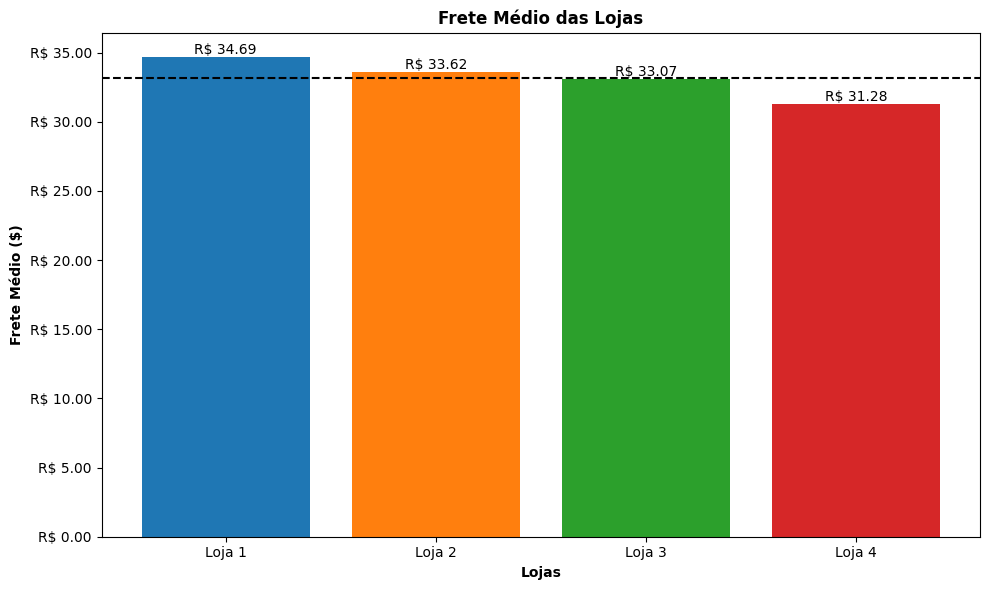

In [ ]:
figure, ax = plt.subplots(figsize=(10, 6))

frete_chart = ax.bar(frete_medio.columns, frete_medio.values[0],
       color=["tab:blue", "tab:orange", "tab:green", "tab:red"])
plt.gca().set_yticklabels([f'R$ {x:.2f}' for x in ax.get_yticks()])

ax.set_title('Frete Médio das Lojas', fontweight='bold')
ax.set_xlabel('Lojas', fontweight='bold')
ax.set_ylabel('Frete Médio ($)', fontweight='bold')

ax.bar_label(frete_chart,
             label_type='edge',
             labels=[f'R$ {x:.2f}' for x in frete_medio.values[0]])

ax.axhline(y=frete_medio.values[0].mean(), color='black', linestyle='--')

plt.tight_layout()
plt.show()

### 📊 Relatório: Análise do Frete Médio por Loja

- A Loja 1 apresenta o maior frete médio, com 34,69 reais, superando as demais em até 3,41 em relação à Loja 4.

* A Loja 4, por sua vez, tem o frete mais acessível, o que pode representar uma vantagem competitiva na decisão de compra de clientes sensíveis a custos logísticos.

* As Loja 2 e Loja 3 têm fretes médios muito próximos, sugerindo uma política de preços semelhante.

### 📈 Média Geral de Frete:
Uma linha pontilhada foi desenhada no gráfico representando a média geral de frete entre as lojas analisadas, aproximadamente R$ 33,17.

> # Conclusão

De acordo com os dados das lojas, a **Loja 4** deveria ser vendida devido aos seguintes fatores:

* Menor faturamento dentre as três lojas.
* A segunda menor média de avaliação, ou seja, mesmo com baixo faturamento possui baixa taxa de aceitação.
* É a loja que menos vende dentro da maioria das categorias de produtos.